In [8]:
import pandas as pd
import nltk
import pickle
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
df = pd.read_feather('final_movie_dataset.feather')

In [10]:
df

,id,title,text
0,278,The Shawshank Redemption,framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,the true story of how businessman oskar schind...
4,240,The Godfather: Part II,in the continuing saga of the corleone crime f...
...,...,...,...
9995,390989,Sharknado 4: The 4th Awakens,the new installment of the sharknado franchise...
9996,340674,Dark Crimes,"tadek, a polish detective, becomes suspicious ..."
9997,11586,Exorcist II: The Heretic,bizarre nightmares plague regan macneil four y...
9998,535437,Swiped,"james, a college freshman and computer genius,..."


# *Tokenization and Stemming*

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
df['text'] = df['text'].apply(word_tokenize)

In [13]:
df['text'] 

0       [framed, in, the, 1940s, for, the, double, mur...
1       [raj, is, a, rich, ,, carefree, ,, happy-go-lu...
2       [spanning, the, years, 1945, to, 1955, ,, a, c...
3       [the, true, story, of, how, businessman, oskar...
4       [in, the, continuing, saga, of, the, corleone,...
                              ...                        
9995    [the, new, installment, of, the, sharknado, fr...
9996    [tadek, ,, a, polish, detective, ,, becomes, s...
9997    [bizarre, nightmares, plague, regan, macneil, ...
9998    [james, ,, a, college, freshman, and, computer...
9999    [a, volcanic, eruption, in, iceland, sends, a,...
Name: text, Length: 10000, dtype: object

---

***We can use Stemming or Lemmatization to convert almost same words to one word. There are some differences between them but in this project I used Stemming. The code for Lemmatization is:***

```
from nltk.stem import WordNetLemmatizer     # to convert almost same words to one word e.g: ['dancing', 'danced', 'dance'] to ['danc']
wordnet_lem = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([wordnet_lem.lemmatize(y) for y in x]))
```
---







In [14]:
# Snowball Stemming
from nltk.stem import SnowballStemmer      # to convert almost same words to one word e.g: ['dancing', 'danced', 'dance'] to ['danc']
snowball = SnowballStemmer(language='english')
df['text'] = df['text'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))

In [15]:
df['text']

0       frame in the 1940s for the doubl murder of his...
1       raj is a rich , carefre , happy-go-lucki secon...
2       span the year 1945 to 1955 , a chronicl of the...
3       the true stori of how businessman oskar schind...
4       in the continu saga of the corleon crime famil...
                              ...                        
9995    the new instal of the sharknado franchis take ...
9996    tadek , a polish detect , becom suspici of a c...
9997    bizarr nightmar plagu regan macneil four year ...
9998    jame , a colleg freshman and comput genius , i...
9999    a volcan erupt in iceland send a glacier towar...
Name: text, Length: 10000, dtype: object

# *Text to Vector using BAG of Words and Tf-idf Technique*

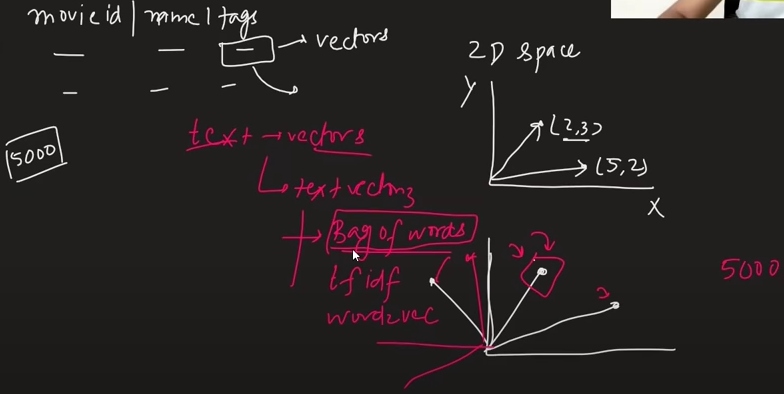

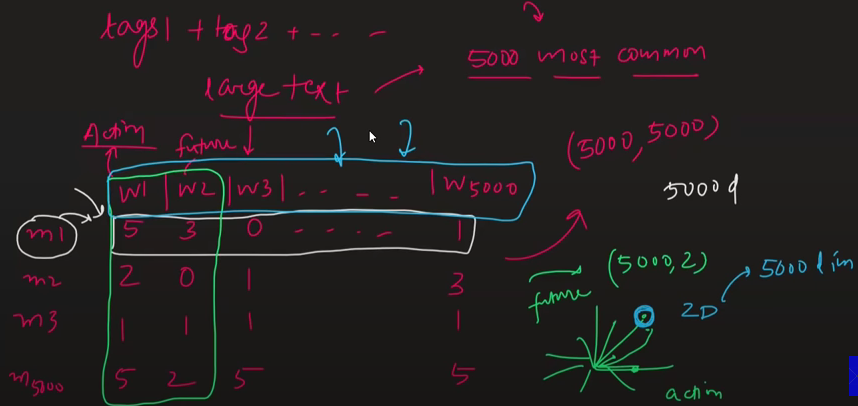



---
**I have used Tf-idf Technique in this project but code for Bag of Words Technique is:**


```
from sklearn.feature_extraction.text import CountVectorizer      # to change from text to vector using BAG_OF_WORDS technique
model = CountVectorizer(max_features=10000, stop_words='english')     # max_feature is used to take most common words among all the text of movies. Here 10000 most common words are chosen
                                                                      # stop_words is used to not count words which is used for sentence formation e.g: and,for,to,the,a etc.
x = model.fit_transform(df['text'])       # output is matrix
vector = x.toarray()      # converting matrix to array
```



In [16]:
# Tf-idf Technique
from sklearn.feature_extraction.text import TfidfVectorizer    # to change from text to vector using Tf-idf technique

In [17]:
model = TfidfVectorizer(max_features=10000, stop_words='english')   # max_feature is used to take most common words among all the text of movies. Here 10000 most common words are chosen
                                                                    # stop_words is used to not count words which is used for sentence formation e.g: and,for,to,the,a etc.

In [18]:
x = model.fit_transform(df['text'])  # output is matrix

In [19]:
vector = x.toarray()  # converting matrix to array

In [20]:
vector.shape

(10000, 10000)

In [21]:
model.get_feature_names()   # the most common 10000 words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '10',
 '100',
 '11',
 '11thcenturi',
 '12',
 '12th',
 '12thcenturi',
 '13',
 '13thcenturi',
 '14',
 '14thcenturi',
 '15',
 '150',
 '15th',
 '15thcenturi',
 '16',
 '16th',
 '16thcenturi',
 '17',
 '17th',
 '17thcenturi',
 '18',
 '1890s',
 '18th',
 '18thcenturi',
 '19',
 '1910s',
 '1920s',
 '1930s',
 '1940',
 '1940s',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1947',
 '1950s',
 '1957',
 '1958',
 '1959',
 '1960',
 '1960s',
 '1962',
 '1964',
 '1965',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1996',
 '1999',
 '19th',
 '19thcenturi',
 '1stcenturi',
 '20',
 '200',
 '2000s',
 '2001',
 '2006',
 '2008',
 '2009',
 '2010s',
 '2013',
 '2020s',
 '2030s',
 '2040s',
 '20th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '30',
 '300',
 '35',
 '3d',
 '40',
 '400',
 '45',
 '47',
 '48',
 '

# Cosine distance between vectors

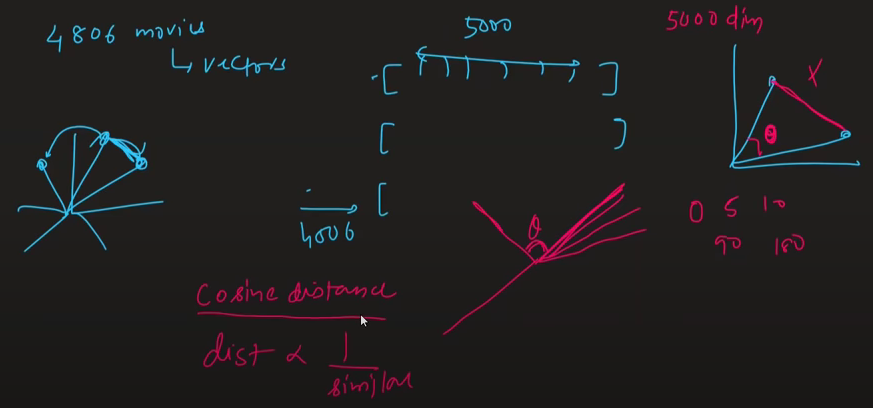

In [22]:
from sklearn.metrics.pairwise import cosine_similarity        

In [23]:
similarity_angle = cosine_similarity(vector)      # angle between the movies 

In [24]:
similarity_angle.shape

(10000, 10000)

In [25]:
similarity_angle          # A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. 
                          # The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

array([[1.        , 0.01256167, 0.04624977, ..., 0.00196827, 0.00193945,
        0.01170742],
       [0.01256167, 1.        , 0.01075254, ..., 0.00267921, 0.01208794,
        0.00706178],
       [0.04624977, 0.01075254, 1.        , ..., 0.00748003, 0.00181413,
        0.00970538],
       ...,
       [0.00196827, 0.00267921, 0.00748003, ..., 1.        , 0.0023302 ,
        0.        ],
       [0.00193945, 0.01208794, 0.00181413, ..., 0.0023302 , 1.        ,
        0.        ],
       [0.01170742, 0.00706178, 0.00970538, ..., 0.        , 0.        ,
        1.        ]])

In [26]:
similarity_angle[0]      # angle between 1st movie and other 10000 movies

array([1.        , 0.01256167, 0.04624977, ..., 0.00196827, 0.00193945,
       0.01170742])

In [40]:
def recommend(movie):
    movie_index = df.index[df['title'] == movie].tolist()[0]      # we need values only not list so we used [0] to get first value of list
    similarity = similarity_angle[movie_index]      # angles without index
    angle_with_index = enumerate(similarity)       # angles with index
    angle_tuple = list(angle_with_index)       # list of tuple of angles 
    descending_angle = sorted(angle_tuple, key=lambda tup: tup[1], reverse=True)      # sorted in descending order w.r.t angle
    movie_recommend = descending_angle[1:8]      # selecting angle from 2nd row until 7th row
    for i in movie_recommend:
        print(df.iloc[i[0],1])         # i[0] gives us first elements of all tuples. 



---
***List of tuples e.g:***

list_of_tuples =[(1,'sravan'), (2,'ojaswi'),(3,'bobby'), (4,'rohith'), (5,'gnanesh')]

0[0] = 1          
0[1] = 'sravan'

1[0] = 2         
1[1] = 'ojaswi'

2[0] = 3         
2[1] = 'bobby'

---
```
list_of_tuples =[(1,'sravan'), (2,'ojaswi'),(3,'bobby'), (4,'rohith'), (5,'gnanesh')]
for i in list_of_tuples:
    print(i[1])
    print(i[0])

output:
1
sravan
2
ojaswi
3
bobby
4
rohith
5
gnanesh
```




In [53]:
recommend('Batman')

Batman Returns
The Dark Knight
Batman: Under the Red Hood
Batman: Return of the Caped Crusaders
Batman Beyond: Return of the Joker
Batman: The Killing Joke
Batman Begins


In [54]:
pickle.dump(df,open('movie_list.pkl','wb'))

In [55]:
pickle.dump(similarity_angle,open('similarity_angle.pkl','wb'))